# VOC 고객 해지 예측 모델링
#### 1. KT Dataset 가져오기 (완료)
#### 2. Jupyter Lab 노트북 파일 생성 (완료)
#### 3. 데이터 로드하기
#### 4. 데이터 구성 확인 및 결측치 처리, 불필요 컬럼(Feature)을 데이터셋에서 제외
#### 5. 인코딩(LabelEncoder, OneHotEncoder, pd.get_dummies)
#### 6. Train, Test 데이터셋 분할하기
#### 7. 정규화(MinMaxScaling)
#### 8. 머신러닝 모델 구현
#### 9. 딥러닝 심층신경망 모델 구현
#### 10. 모델 평가하기

In [1]:
# 코드실행시 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

### seaborn 라이브러리 설치

<Br>
<font color=blue>[문제] pip 이용해서 seaborn 설치하기</font>

In [2]:
# 맨 앞쪽에 ! 사용하면 리눅스 명령어 수행할수 있습니다.
!pip install seaborn





Looking in indexes: http://10.220.235.19/pypi/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### 라이브러리 임포트(numpy, pandas, matplotlib, seaborn)

<br>
<font color=blue>[문제] numpy 별칭을 np로, pandas 별칭을 pd로 해서 임포트 하세요</font>

In [3]:
# import 명령 사용하면 됩니다.
# numpy와 pandas 라이브러리 임포트 합니다.
import numpy as np
import pandas as pd




In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### AIDU 라이브러리 임포트 및 AIDU 연동 변수 설정

In [5]:
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm

aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)

#  
# 3. 데이터 로드

<br>
<font color=blue>[문제] pandas read_csv 함수를 사용하여 voc_rcp_test.csv 파일 읽어오세요</font>

In [6]:
# AIDU 파일 저장 위치 변수 : aidu_framework.config.data_dir
# 읽어올 파일명 : voc_rcp_test.csv
# 읽어온 파일을 DataFrame "df" 이름으로 저장



df = pd.read_csv(aidu_framework.config.data_dir + '/voc_rcp_test.csv')

In [7]:
df.head()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_pty_sbt_id,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
0,10000,1001061191,2056,10009,10002,_,1370499225,O,1001060911,021,...,0.0,_,10001,_,_,99991231,N,_,0.0,N
1,10000,1000823687,1578,10003,10002,_,1314659377,J,1000851875,054,...,0.0,10268,10008,15097,15244,20200921,N,N,0.0,N
2,10004,1001027747,184,10007,10002,10003,1272140800,I,1000737200,054,...,0.0,_,10037,15097,15249,20180122,N,_,0.0,N
3,10000,1000665328,3321,10009,10002,10026,1310661162,G,1000001126,049,...,0.0,_,10001,_,_,99991231,N,_,0.0,N
4,10000,1001027747,289,10009,10002,_,1305280435,F,1000737200,048,...,0.0,_,10001,15097,15244,20230410,N,_,0.0,N


<br>
<font color=blue>[문제] "df" DataFrame 이용해서 읽어들이 파일의 뒤부분 5줄 출력하세요</font>

In [8]:
# tail() 함수 사용



df.tail()

,voc_trt_perd_itg_cd,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,voc_trt_reslt_itg_cd,cust_pty_sbt_id,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,...,voc_dupl_tmscnt,oos_cause_type_itg_cd,voc_trt_need_time_itg_cd,engt_cperd_type_itg_cd,engt_tgt_div_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,fclt_oos_yn,cust_snsry_base_conf_need_time,trm_yn
218890,10000,1001028488,2174,10009,10002,_,1303049448,L,1000851716,046,...,0.0,_,10001,15098,15244,20181128,N,_,0.0,N
218891,10000,1000711651,504,10011,10002,_,1310743140,_,1000001564,_,...,0.0,_,10001,_,_,99991231,N,_,0.0,N
218892,10000,1001047798,2174,10009,10002,_,1308673240,I,1001046520,046,...,0.0,_,10001,_,_,99991231,N,_,0.0,N
218893,_,1001027710,2064,10009,10002,_,1318367928,_,-998,_,...,0.0,_,10001,_,_,99991231,N,_,0.0,N
218894,_,1001028708,2106,10009,10002,10081,1286056955,J,1000852208,056,...,0.0,_,10001,15097,15244,20150302,N,_,0.0,N


#  
# 4. 데이터 구성 확인 및 결측치 처리

### 데이터프레임 정보 확인

<br>
<font color=blue>[문제] 데이터프레임 정보(컬럼정보, Null 여부, 타입) 출력하세요</font>

In [9]:
# DataFrame의 info() 함수 활용
# 총 25개 컬럼 있음 확인




df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_trt_perd_itg_cd             218895 non-null  object 
 1   voc_prod_sbt_id                 218895 non-null  int64  
 2   voc_wjt_sorc_id                 218895 non-null  int64  
 3   voc_type_itg_cd                 218895 non-null  int64  
 4   voc_sttus_itg_cd                218895 non-null  int64  
 5   voc_trt_reslt_itg_cd            218895 non-null  object 
 6   cust_pty_sbt_id                 218895 non-null  int64  
 7   cust_clas_itg_cd                218895 non-null  object 
 8   bprod_sbt_id                    218895 non-null  int64  
 9   age_itg_cd                      218895 non-null  object 
 10  cont_sttus_itg_cd               218895 non-null  object 
 11  new_date                        218895 non-null  int64  
 12  opn_nfl_chg_date

### 데이터프레임 인덱스 확인

In [10]:
df.index

RangeIndex(start=0, stop=218895, step=1)

### 데이터프레임 컬럼 확인

In [11]:
df.columns

Index(['voc_trt_perd_itg_cd', 'voc_prod_sbt_id', 'voc_wjt_sorc_id',
       'voc_type_itg_cd', 'voc_sttus_itg_cd', 'voc_trt_reslt_itg_cd',
       'cust_pty_sbt_id', 'cust_clas_itg_cd', 'bprod_sbt_id', 'age_itg_cd',
       'cont_sttus_itg_cd', 'new_date', 'opn_nfl_chg_date',
       'cust_dtl_ctg_itg_cd', 'voc_trt_degr_div_itg_cd', 'voc_dupl_tmscnt',
       'oos_cause_type_itg_cd', 'voc_trt_need_time_itg_cd',
       'engt_cperd_type_itg_cd', 'engt_tgt_div_itg_cd', 'cont_fns_pam_date',
       'voc_mis_pbls_yn', 'fclt_oos_yn', 'cust_snsry_base_conf_need_time',
       'trm_yn'],
      dtype='object')

### 데이터프레임  값(value) 확인

In [12]:
df.values

array([['10000', 1001061191, 2056, ..., '_', 0.0, 'N'],
       ['10000', 1000823687, 1578, ..., 'N', 0.0, 'N'],
       ['10004', 1001027747, 184, ..., '_', 0.0, 'N'],
       ...,
       ['10000', 1001047798, 2174, ..., '_', 0.0, 'N'],
       ['_', 1001027710, 2064, ..., '_', 0.0, 'N'],
       ['_', 1001028708, 2106, ..., '_', 0.0, 'N']], dtype=object)

### 데이터프레임의  계산 가능한 값들에 대한 통계치 확인

In [13]:
df.describe()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_pty_sbt_id,bprod_sbt_id,new_date,opn_nfl_chg_date,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,cust_snsry_base_conf_need_time
count,2.188950e+05,218895.000000,218895.000000,218895.000000,2.188950e+05,2.188950e+05,2.188950e+05,2.188950e+05,218895.000000,218895.000000,218895.000000,2.188950e+05,2.188950e+05
mean,9.912355e+08,1555.415898,10008.521835,10002.043619,1.317855e+09,8.820966e+08,1.740581e+07,1.740779e+07,20001.078947,0.008260,10002.677571,7.085782e+07,3.653538e+02
std,9.804954e+07,1074.197905,1.557674,0.319019,3.936161e+07,3.234613e+08,6.890518e+06,6.891301e+06,0.269656,0.101093,6.576401,3.841708e+07,1.462701e+04
min,-9.980000e+02,126.000000,10003.000000,10002.000000,-9.980000e+02,-9.980000e+02,1.010100e+04,1.010100e+04,20001.000000,0.000000,10001.000000,2.001063e+07,0.000000e+00
25%,1.000782e+09,360.000000,10009.000000,10002.000000,1.289193e+09,1.000003e+09,2.008100e+07,2.009032e+07,20001.000000,0.000000,10001.000000,2.022013e+07,0.000000e+00
50%,1.001028e+09,2055.000000,10009.000000,10002.000000,1.306817e+09,1.000768e+09,2.015010e+07,2.015040e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.000000e+00
75%,1.001043e+09,2153.000000,10009.000000,10002.000000,1.328573e+09,1.001044e+09,2.018012e+07,2.018040e+07,20001.000000,0.000000,10001.000000,9.999123e+07,0.000000e+00
max,1.001079e+09,3856.000000,10018.000000,10005.000000,1.415514e+09,1.001078e+09,2.020042e+07,2.020042e+07,20002.000000,5.000000,10038.000000,9.999123e+07,2.389486e+06


### 널(null)값 확인

<br>
<font color=blue>[문제] DataFrame 컬럼 항목에 Null 존재하는지 확인하세요</font>

In [14]:
# DataFrame의 isnull() 함수 사용
# Null 합계를 보려면 sum() 함수 사용


df.isnull().sum()

voc_trt_perd_itg_cd               0
voc_prod_sbt_id                   0
voc_wjt_sorc_id                   0
voc_type_itg_cd                   0
voc_sttus_itg_cd                  0
voc_trt_reslt_itg_cd              0
cust_pty_sbt_id                   0
cust_clas_itg_cd                  0
bprod_sbt_id                      0
age_itg_cd                        0
cont_sttus_itg_cd                 0
new_date                          0
opn_nfl_chg_date                  0
cust_dtl_ctg_itg_cd               0
voc_trt_degr_div_itg_cd           0
voc_dupl_tmscnt                   0
oos_cause_type_itg_cd             0
voc_trt_need_time_itg_cd          0
engt_cperd_type_itg_cd            0
engt_tgt_div_itg_cd               0
cont_fns_pam_date                 0
voc_mis_pbls_yn                   0
fclt_oos_yn                       0
cust_snsry_base_conf_need_time    0
trm_yn                            0
dtype: int64

### voc_trt_perd_itg_cd 컬럼 데이터 확인

In [15]:
df['voc_trt_perd_itg_cd']

0         10000
1         10000
2         10004
3         10000
4         10000
          ...  
218890    10000
218891    10000
218892    10000
218893        _
218894        _
Name: voc_trt_perd_itg_cd, Length: 218895, dtype: object

### voc_trt_perd_itg_cd 컬럼 데이터별 건수 확인

<br>
<font color=blue>[문제] voc_trt_perd_itg_cd 컬럼 데이터별 건수를 나열하세요</font>

In [16]:
# DataFrame의 value_counts() 함수 사용



df['voc_trt_perd_itg_cd'].value_counts()

_        118412
10000     93625
10001      3785
10002      1371
10003       505
10004       362
10005       151
10006       143
10009        87
10007        81
10010        75
10011        59
10008        58
10015        42
10014        38
10016        34
10012        32
10013        21
10017        14
Name: voc_trt_perd_itg_cd, dtype: int64

In [17]:
# voc_trt_perd_itg_cd 컬럼 데이터별 건수 비율 보기
df['voc_trt_perd_itg_cd'].value_counts(normalize=True)

_        0.540953
10000    0.427716
10001    0.017291
10002    0.006263
10003    0.002307
10004    0.001654
10005    0.000690
10006    0.000653
10009    0.000397
10007    0.000370
10010    0.000343
10011    0.000270
10008    0.000265
10015    0.000192
10014    0.000174
10016    0.000155
10012    0.000146
10013    0.000096
10017    0.000064
Name: voc_trt_perd_itg_cd, dtype: float64

### 모든 컬럼에 대한 데이터 분포 건수 확인

In [18]:
[df[c].value_counts() for c in df]

[_        118412
 10000     93625
 10001      3785
 10002      1371
 10003       505
 10004       362
 10005       151
 10006       143
 10009        87
 10007        81
 10010        75
 10011        59
 10008        58
 10015        42
 10014        38
 10016        34
 10012        32
 10013        21
 10017        14
 Name: voc_trt_perd_itg_cd, dtype: int64,
 1001027747    30572
 1000665328    22575
 1001027746     9723
 1001047801     9347
 1001044841     8200
               ...  
 1001033832        1
 1001029366        1
 1000668838        1
 1000779244        1
 1000669216        1
 Name: voc_prod_sbt_id, Length: 1896, dtype: int64,
 2153    42030
 329      8370
 656      7863
 2174     7430
 3086     7282
         ...  
 2989        1
 2396        1
 3517        1
 3663        1
 2999        1
 Name: voc_wjt_sorc_id, Length: 980, dtype: int64,
 10009    192941
 10003     14704
 10007      9876
 10011      1218
 10017        86
 10013        35
 10005        20
 10018        12


In [19]:
[df[c].value_counts(normalize=True) for c in df]   

[_        0.540953
 10000    0.427716
 10001    0.017291
 10002    0.006263
 10003    0.002307
 10004    0.001654
 10005    0.000690
 10006    0.000653
 10009    0.000397
 10007    0.000370
 10010    0.000343
 10011    0.000270
 10008    0.000265
 10015    0.000192
 10014    0.000174
 10016    0.000155
 10012    0.000146
 10013    0.000096
 10017    0.000064
 Name: voc_trt_perd_itg_cd, dtype: float64,
 1001027747    0.139665
 1000665328    0.103132
 1001027746    0.044419
 1001047801    0.042701
 1001044841    0.037461
                 ...   
 1001033832    0.000005
 1001029366    0.000005
 1000668838    0.000005
 1000779244    0.000005
 1000669216    0.000005
 Name: voc_prod_sbt_id, Length: 1896, dtype: float64,
 2153    0.192010
 329     0.038238
 656     0.035921
 2174    0.033943
 3086    0.033267
           ...   
 2989    0.000005
 2396    0.000005
 3517    0.000005
 3663    0.000005
 2999    0.000005
 Name: voc_wjt_sorc_id, Length: 980, dtype: float64,
 10009    0.881432
 10003 

### 컬럼에서  '_' 값이 차지하는 비율
- voc_trt_perd_itg_cd : 0.54
- voc_trt_reslt_itg_cd : 0.88
- oos_cause_type_itg_cd : 0.9
- engt_cperd_type_itg_cd : 0.63
- engt_tgt_div_itg_cd : 0.63
- fclt_oos_yn : 0.90  
- cust_clas_itg_cd : 0.2
- age_itg_cd : 0.22
- cont_sttus_itg_cd : 0.11
- cust_dtl_ctg_itg_cd : 0.11
- voc_mis_pbls_yn : 0.008


### '_'  값이 50% 이상 차지하는 컬럼 삭제하고 df1 변수에 대입

<br>
<font color=blue>[문제] voc_trt_perd_itg_cd 컬럼 삭제하기</font>

In [20]:
# DataFrame drop() 함수 사용
# voc_trt_perd_itg_cd 컬럼 삭제 결과를 "df1" DataFrame 저장




df1 = df.drop(columns=['voc_trt_perd_itg_cd'])

In [21]:
# 앞전에 25개 컬럼 있었는데 1개 컬럼 삭제되어 24컬럼 보임
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_prod_sbt_id                 218895 non-null  int64  
 1   voc_wjt_sorc_id                 218895 non-null  int64  
 2   voc_type_itg_cd                 218895 non-null  int64  
 3   voc_sttus_itg_cd                218895 non-null  int64  
 4   voc_trt_reslt_itg_cd            218895 non-null  object 
 5   cust_pty_sbt_id                 218895 non-null  int64  
 6   cust_clas_itg_cd                218895 non-null  object 
 7   bprod_sbt_id                    218895 non-null  int64  
 8   age_itg_cd                      218895 non-null  object 
 9   cont_sttus_itg_cd               218895 non-null  object 
 10  new_date                        218895 non-null  int64  
 11  opn_nfl_chg_date                218895 non-null  int64  
 12  cust_dtl_ctg_itg

In [22]:
# 'df1' DataFrame에서 '_' 값이 50% 이상되는 나머지 컬럼도 삭제

df1 = df1.drop(columns=['voc_trt_reslt_itg_cd',
                       'oos_cause_type_itg_cd',
                       'engt_cperd_type_itg_cd',
                       'engt_tgt_div_itg_cd',
                       'fclt_oos_yn'
                      ])

In [23]:
# 위의 drop 함수 사용한 결과와 동일. 하지만 사용방법이 약간 다름
# df1 = df.drop(['voc_trt_reslt_itg_cd',
#                'oos_cause_type_itg_cd',
#                'engt_cperd_type_itg_cd',
#                'engt_tgt_div_itg_cd',
#                'fclt_oos_yn'
#                ], axis=1)

### df1 데이터프레임 정보 확인

In [24]:
# 이전에 24컬럼에서 5개 컬럼 삭제했으니 19개 컬럼 남음
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_prod_sbt_id                 218895 non-null  int64  
 1   voc_wjt_sorc_id                 218895 non-null  int64  
 2   voc_type_itg_cd                 218895 non-null  int64  
 3   voc_sttus_itg_cd                218895 non-null  int64  
 4   cust_pty_sbt_id                 218895 non-null  int64  
 5   cust_clas_itg_cd                218895 non-null  object 
 6   bprod_sbt_id                    218895 non-null  int64  
 7   age_itg_cd                      218895 non-null  object 
 8   cont_sttus_itg_cd               218895 non-null  object 
 9   new_date                        218895 non-null  int64  
 10  opn_nfl_chg_date                218895 non-null  int64  
 11  cust_dtl_ctg_itg_cd             218895 non-null  object 
 12  voc_trt_degr_div

In [25]:
# cust_clas_itg_cd 컬럼에 '_' 값 있는지 확인 : 아직도 있네
df1[df1['cust_clas_itg_cd'] == '_']

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_pty_sbt_id,cust_clas_itg_cd,bprod_sbt_id,age_itg_cd,cont_sttus_itg_cd,new_date,opn_nfl_chg_date,cust_dtl_ctg_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,cont_fns_pam_date,voc_mis_pbls_yn,cust_snsry_base_conf_need_time,trm_yn
8,1000787867,2153,10009,10002,1318367928,_,-998,_,_,10101,10101,_,20001,0.0,10001,99991231,N,0.0,N
9,1001054411,2153,10009,10002,1304628723,_,1000001126,_,10001,20010912,20010912,90027,20001,0.0,10001,99991231,N,0.0,N
27,1000665328,1646,10003,10005,1280695981,_,1000001126,_,10001,19971129,19971129,90056,20001,0.0,10038,99991231,N,0.0,N
31,1000665328,2106,10009,10002,1309393567,_,1000001126,_,10001,20160728,20160728,90056,20001,0.0,10001,99991231,N,0.0,N
32,1001027746,3094,10009,10002,1380827627,_,1000702598,_,10001,20180319,20180319,90056,20001,0.0,10001,20210318,N,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218883,1000669297,2174,10009,10002,1318367928,_,-998,_,_,10101,10101,_,20001,0.0,10001,99991231,N,0.0,N
218885,1001027747,2153,10009,10002,1303256678,_,-998,_,_,10101,10101,_,20001,0.0,10001,99991231,N,0.0,N
218889,1000792727,2177,10009,10003,1318367928,_,-998,_,_,10101,10101,_,20002,0.0,10038,99991231,N,0.0,N
218891,1000711651,504,10011,10002,1310743140,_,1000001564,_,10001,20200309,20200309,90024,20001,0.0,10001,99991231,N,0.0,N


### 남아있는 '_'값을 null로 변경

<br>
<font color=blue>[문제] DataFrame replace 함수를 사용해서 모든 컬럼에 대해 '_'값을 null로 변경하세요</font>

In [26]:
# DataFrame replace 함수 사용
# Null 표현: np.nan 
# "df1" DataFrame에 자체에 저장할 것이므로 inplace=True 사용



df1.replace('_',np.nan,inplace=True)

In [27]:
# 이전에 Null 없던 cust_clas_itg_cd, age_itg_cd 컬럼등에서 Null 있어 보인다.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_prod_sbt_id                 218895 non-null  int64  
 1   voc_wjt_sorc_id                 218895 non-null  int64  
 2   voc_type_itg_cd                 218895 non-null  int64  
 3   voc_sttus_itg_cd                218895 non-null  int64  
 4   cust_pty_sbt_id                 218895 non-null  int64  
 5   cust_clas_itg_cd                174900 non-null  object 
 6   bprod_sbt_id                    218895 non-null  int64  
 7   age_itg_cd                      170697 non-null  object 
 8   cont_sttus_itg_cd               192950 non-null  object 
 9   new_date                        218895 non-null  int64  
 10  opn_nfl_chg_date                218895 non-null  int64  
 11  cust_dtl_ctg_itg_cd             192948 non-null  object 
 12  voc_trt_degr_div

In [28]:
# 컬럼별 Null 갯수 확인
df1.isnull().sum()

voc_prod_sbt_id                       0
voc_wjt_sorc_id                       0
voc_type_itg_cd                       0
voc_sttus_itg_cd                      0
cust_pty_sbt_id                       0
cust_clas_itg_cd                  43995
bprod_sbt_id                          0
age_itg_cd                        48198
cont_sttus_itg_cd                 25945
new_date                              0
opn_nfl_chg_date                      0
cust_dtl_ctg_itg_cd               25947
voc_trt_degr_div_itg_cd               0
voc_dupl_tmscnt                       0
voc_trt_need_time_itg_cd              0
cont_fns_pam_date                     0
voc_mis_pbls_yn                    1830
cust_snsry_base_conf_need_time        0
trm_yn                                0
dtype: int64

###  Object 데이터타입의 Null값 처리
- cust_clas_itg_cd 
- age_itg_cd
- cont_sttus_itg_cd
- cust_dtl_ctg_itg_cd
- voc_mis_pbls_yn

In [29]:
df1.dtypes

voc_prod_sbt_id                     int64
voc_wjt_sorc_id                     int64
voc_type_itg_cd                     int64
voc_sttus_itg_cd                    int64
cust_pty_sbt_id                     int64
cust_clas_itg_cd                   object
bprod_sbt_id                        int64
age_itg_cd                         object
cont_sttus_itg_cd                  object
new_date                            int64
opn_nfl_chg_date                    int64
cust_dtl_ctg_itg_cd                object
voc_trt_degr_div_itg_cd             int64
voc_dupl_tmscnt                   float64
voc_trt_need_time_itg_cd            int64
cont_fns_pam_date                   int64
voc_mis_pbls_yn                    object
cust_snsry_base_conf_need_time    float64
trm_yn                             object
dtype: object

- cust_clas_itg_cd : 최빈값(mode)으로 변경

In [30]:
df1['cust_clas_itg_cd']

0           O
1           J
2           I
3           G
4           F
         ... 
218890      L
218891    NaN
218892      I
218893    NaN
218894      J
Name: cust_clas_itg_cd, Length: 218895, dtype: object

In [31]:
# cust_clas_itg_cd 컬럼에 대한 값 분포 확인
# 'L' 가장 많다.

df1['cust_clas_itg_cd'].value_counts()

L    62493
G    37940
I    27172
J    22368
F    19214
O     5568
H       78
M       45
V       17
R        5
Name: cust_clas_itg_cd, dtype: int64

<br>
<font color=blue>[문제] 'cust_clas_itg_cd' 컬럼의 값중에 Null을 'L'로 변경하세요(fillna 함수 사용)</font>

In [32]:
# DataFrame의 fillna() 함수 사용
# 적용 대상 컬럼 : 'cust_clas_itg_cd'
# "df1" DataFrame에 자체에 저장할 것이므로 inplace=True 사용



df1['cust_clas_itg_cd'].fillna('L', inplace=True)

In [33]:
# fillna 대신 replace함수 사용하여 처리해도 됨.
#df1['cust_clas_itg_cd'].replace(np.nan, 'L', inplace=True)

In [34]:
# cust_clas_itg_cd 컬럼 Null 갯수 확인
df1['cust_clas_itg_cd'].isnull().sum()

0

- age_itg_cd : 중앙값(median)으로 변경하고 데이터 타입을 정수(int)로 변경

In [35]:
df1['age_itg_cd']

0         021
1         054
2         054
3         049
4         048
         ... 
218890    046
218891    NaN
218892    046
218893    NaN
218894    056
Name: age_itg_cd, Length: 218895, dtype: object

In [36]:
df1['age_itg_cd'].median()

48.0

In [37]:
# 'age_itg_cd' 컬럼에 대해 null 값을 중간값 48로 replace함
df1['age_itg_cd'].replace(np.nan, 48, inplace=True)

In [38]:
# 'age_itg_cd' 컬럼 type : Object 확인
df1['age_itg_cd'].dtypes

dtype('O')

<br>
<font color=blue>[문제] 'age_itg_cd' 컬럼 type을 'Object' 에서 'int' type으로 변경하세요</font>

In [39]:
# DataFrame의 astype() 함수 사용하고 int 인자 넣으면 됨.
# 변경 대상 : df1['age_itg_cd']



df1['age_itg_cd'] = df1['age_itg_cd'].astype(int)

In [40]:
df1['age_itg_cd'].isnull().sum()

0

In [41]:
df1['age_itg_cd']

0         21
1         54
2         54
3         49
4         48
          ..
218890    46
218891    48
218892    46
218893    48
218894    56
Name: age_itg_cd, Length: 218895, dtype: int64

In [42]:
# age_itg_cd 컬럼 type : int64 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_prod_sbt_id                 218895 non-null  int64  
 1   voc_wjt_sorc_id                 218895 non-null  int64  
 2   voc_type_itg_cd                 218895 non-null  int64  
 3   voc_sttus_itg_cd                218895 non-null  int64  
 4   cust_pty_sbt_id                 218895 non-null  int64  
 5   cust_clas_itg_cd                218895 non-null  object 
 6   bprod_sbt_id                    218895 non-null  int64  
 7   age_itg_cd                      218895 non-null  int64  
 8   cont_sttus_itg_cd               192950 non-null  object 
 9   new_date                        218895 non-null  int64  
 10  opn_nfl_chg_date                218895 non-null  int64  
 11  cust_dtl_ctg_itg_cd             192948 non-null  object 
 12  voc_trt_degr_div

- cont_sttus_itg_cd : 최빈값(mode)으로 변경

In [43]:
df1['cont_sttus_itg_cd'].isnull().sum()

25945

In [44]:
df1['cont_sttus_itg_cd'].value_counts()

10001    171474
10005     12412
10007      3739
10003      3618
10002      1290
10006       348
10004        69
Name: cont_sttus_itg_cd, dtype: int64

In [45]:
df1['cont_sttus_itg_cd'].replace(np.nan,'10001', inplace=True)

In [46]:
df1['cont_sttus_itg_cd'].isnull().sum()

0

- cust_dtl_ctg_itg_cd : 최빈값(mode)으로 변경

In [47]:
df1['cust_dtl_ctg_itg_cd'].isnull().sum()

25947

In [48]:
df1['cust_dtl_ctg_itg_cd'].value_counts()

10003    113729
10002     28127
90029     23399
90056      9427
10019      8499
90027      5377
90024      2735
90030       639
10011       498
10018       467
10001        30
10013        15
10004         6
Name: cust_dtl_ctg_itg_cd, dtype: int64

In [49]:
df1['cust_dtl_ctg_itg_cd'].replace(np.nan,'10003', inplace=True)

In [50]:
df1['cust_dtl_ctg_itg_cd'].isnull().sum()

0

 - voc_mis_pbls_yn 컬럼의 경우 'N' 값이 99% 이상 차지하므로 삭제

In [51]:
df1['voc_mis_pbls_yn'].value_counts()

N    217063
Y         2
Name: voc_mis_pbls_yn, dtype: int64

In [52]:
df1.drop(columns=['voc_mis_pbls_yn'], inplace=True)

### 처리 결과  확인

In [53]:
# voc_mis_pbls_yn 컬럼 삭제 되었으며 각 컬럼에 Null 없음 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_prod_sbt_id                 218895 non-null  int64  
 1   voc_wjt_sorc_id                 218895 non-null  int64  
 2   voc_type_itg_cd                 218895 non-null  int64  
 3   voc_sttus_itg_cd                218895 non-null  int64  
 4   cust_pty_sbt_id                 218895 non-null  int64  
 5   cust_clas_itg_cd                218895 non-null  object 
 6   bprod_sbt_id                    218895 non-null  int64  
 7   age_itg_cd                      218895 non-null  int64  
 8   cont_sttus_itg_cd               218895 non-null  object 
 9   new_date                        218895 non-null  int64  
 10  opn_nfl_chg_date                218895 non-null  int64  
 11  cust_dtl_ctg_itg_cd             218895 non-null  object 
 12  voc_trt_degr_div

### 날짜(Date) 관련 컬럼 확인 및 삭제
- new_date 
- opn_nfl_chg_date
-  cont_fns_pam_date

In [54]:
df1['new_date'][:3]

0    20170814
1    20170922
2    20020805
Name: new_date, dtype: int64

In [55]:
df1.drop(columns=['new_date', 'opn_nfl_chg_date', 'cont_fns_pam_date'], inplace=True)

In [56]:
# 날짜 컬럼 삭제 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_prod_sbt_id                 218895 non-null  int64  
 1   voc_wjt_sorc_id                 218895 non-null  int64  
 2   voc_type_itg_cd                 218895 non-null  int64  
 3   voc_sttus_itg_cd                218895 non-null  int64  
 4   cust_pty_sbt_id                 218895 non-null  int64  
 5   cust_clas_itg_cd                218895 non-null  object 
 6   bprod_sbt_id                    218895 non-null  int64  
 7   age_itg_cd                      218895 non-null  int64  
 8   cont_sttus_itg_cd               218895 non-null  object 
 9   cust_dtl_ctg_itg_cd             218895 non-null  object 
 10  voc_trt_degr_div_itg_cd         218895 non-null  int64  
 11  voc_dupl_tmscnt                 218895 non-null  float64
 12  voc_trt_need_tim

#  
# 5. 인코더(Encoder)

### LabelEncoder

In [57]:
# 컬럼 타입 Ojbect 선택
cat_cols = df1.select_dtypes(include='object')

In [58]:
cat_cols.head()

,cust_clas_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,trm_yn
0,O,10003,10003,N
1,J,10001,10002,N
2,I,10001,90029,N
3,G,10005,10003,N
4,F,10005,10002,N


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
# cust_clas_itg_cd 컬럼에 대해 LabelEncoder 
le = LabelEncoder()
cat_cols['le_cust_clas_itg_cd'] = le.fit_transform(cat_cols['cust_clas_itg_cd'])

In [61]:
cat_cols.head()

,cust_clas_itg_cd,cont_sttus_itg_cd,cust_dtl_ctg_itg_cd,trm_yn,le_cust_clas_itg_cd
0,O,10003,10003,N,7
1,J,10001,10002,N,4
2,I,10001,90029,N,3
3,G,10005,10003,N,1
4,F,10005,10002,N,0


In [62]:
le.classes_

array(['F', 'G', 'H', 'I', 'J', 'L', 'M', 'O', 'R', 'V'], dtype=object)

### OneHotEncoder : pd.get_dummies 활용

In [63]:
cat_cols[['cust_clas_itg_cd']].head()

,cust_clas_itg_cd
0,O
1,J
2,I
3,G
4,F


In [64]:
# cust_clas_itg_cd 컬럼에 대해 OneHotEncoder
pd.get_dummies(cat_cols['cust_clas_itg_cd']).head()

,F,G,H,I,J,L,M,O,R,V
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [65]:
# 범주형 컬럼 정의
cat_columns = ['cust_clas_itg_cd', 'cont_sttus_itg_cd', 'cust_dtl_ctg_itg_cd', 'trm_yn']

<br>
<font color=blue>[문제] 범주형 컬럼(cat_columns)에 대해서 Ine-Hot-Encoding될수 있도록 Pandas의 get_dummies 함수 적용하세요</font>

In [66]:
# Pandas의 get_dummies 함수 사용
# 사용옵션 
# - data=df1
# - columns=cat_columns
# - drop_first=True
# 'df1' DataFrame에 적용 결과 저장




df1 = pd.get_dummies(data=df1, columns=cat_columns, drop_first=True)

In [67]:
# 범주형 컬럼에 대해 One-Hot-Encoding 된 컬럼 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218895 entries, 0 to 218894
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   voc_prod_sbt_id                 218895 non-null  int64  
 1   voc_wjt_sorc_id                 218895 non-null  int64  
 2   voc_type_itg_cd                 218895 non-null  int64  
 3   voc_sttus_itg_cd                218895 non-null  int64  
 4   cust_pty_sbt_id                 218895 non-null  int64  
 5   bprod_sbt_id                    218895 non-null  int64  
 6   age_itg_cd                      218895 non-null  int64  
 7   voc_trt_degr_div_itg_cd         218895 non-null  int64  
 8   voc_dupl_tmscnt                 218895 non-null  float64
 9   voc_trt_need_time_itg_cd        218895 non-null  int64  
 10  cust_snsry_base_conf_need_time  218895 non-null  float64
 11  cust_clas_itg_cd_G              218895 non-null  uint8  
 12  cust_clas_itg_cd

# 
# 6. Train, Test 데이터셋 분할하기

In [68]:
df1.head()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_pty_sbt_id,bprod_sbt_id,age_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,...,cust_dtl_ctg_itg_cd_10011,cust_dtl_ctg_itg_cd_10013,cust_dtl_ctg_itg_cd_10018,cust_dtl_ctg_itg_cd_10019,cust_dtl_ctg_itg_cd_90024,cust_dtl_ctg_itg_cd_90027,cust_dtl_ctg_itg_cd_90029,cust_dtl_ctg_itg_cd_90030,cust_dtl_ctg_itg_cd_90056,trm_yn_Y
0,1001061191,2056,10009,10002,1370499225,1001060911,21,20001,0.0,10001,...,0,0,0,0,0,0,0,0,0,0
1,1000823687,1578,10003,10002,1314659377,1000851875,54,20001,0.0,10008,...,0,0,0,0,0,0,0,0,0,0
2,1001027747,184,10007,10002,1272140800,1000737200,54,20002,0.0,10037,...,0,0,0,0,0,0,1,0,0,0
3,1000665328,3321,10009,10002,1310661162,1000001126,49,20001,0.0,10001,...,0,0,0,0,0,0,0,0,0,0
4,1001027747,289,10009,10002,1305280435,1000737200,48,20001,0.0,10001,...,0,0,0,0,0,0,0,0,0,0


### 입력데이터(X)와 레이블(y) 선택

<br>
<font color=blue>[문제] 'trm_yn_Y' 컬럼을 제외한 나머지 컬럼을 X로 만들어라</font>

In [69]:
# 'df1' DataFrame의 drop 함수 사용
# - 옵션 : columns=['trm_yn_Y'] 
# - DataFrame 값을 저장하기위해 values 사용
# 결과를 'X' 저장



X = df1.drop(columns=['trm_yn_Y']).values

In [70]:
X.shape

(218895, 38)

In [71]:
y = df1['trm_yn_Y'].values

In [72]:
y.shape

(218895,)

In [73]:
from sklearn.model_selection import train_test_split

<br>
<font color=blue>[문제] X, y 값을 가지고 8:2 비율로 Train , Test Dataset으로 나누어라.(y 클래스 비율에 맞게 분리 될수 있도록 하자)</font>

In [74]:
# 사이킷런 train_test_split 함수 사용
# - 인자 : X, y, test_size=0.2, stratify=y, random_state=0
# 결과 : X_train, X_test, y_train, y_test 




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [75]:
X_train.shape

(175116, 38)

In [76]:
X_test.shape

(43779, 38)

In [77]:
X_train[:1]

array([[1.00102847e+09, 3.33400000e+03, 1.00090000e+04, 1.00020000e+04,
        1.31767893e+09, 1.00085164e+09, 4.50000000e+01, 2.00010000e+04,
        0.00000000e+00, 1.00010000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [78]:
y_train[:1]

array([0], dtype=uint8)

#   
# 7. 정규화

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [80]:
# voc_prod_sbt_id 컬럼 값이 커다란 숫자로 되어 있음 확인
df1[['voc_prod_sbt_id']].head()

,voc_prod_sbt_id
0,1001061191
1,1000823687
2,1001027747
3,1000665328
4,1001027747


### MinMaxScaling

<br>
<font color=blue>[문제] 사이킷런의 MinMaxScaler 함수 정의하고 mms 변수에 저장하세요.</font>

In [81]:
# 사이킷런의 MinMaxScaler() 함수 사용
# 결과 저장 : mms




mms = MinMaxScaler()

In [82]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [83]:
# voc_prod_sbt_id 컬럼의 값이 1보다 작은 숫자인걸 확인
pd.DataFrame(X_train[:, 0], columns=['voc_prod_sbt_id']).head()

,voc_prod_sbt_id
0,0.999949
1,0.999948
2,0.999948
3,0.999948
4,0.999948


### 데이터 시각화

- 데이터 상관관계(correlation) 확인

<br>
<font color=blue>[문제] Pandas 활용하여 'df1' DataFrame의 데이터 상관관계(correlation) 확인하세요</font>

In [84]:
# 'df1' DataFrame의 corr() 함수 사용



df1.corr()

,voc_prod_sbt_id,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_pty_sbt_id,bprod_sbt_id,age_itg_cd,voc_trt_degr_div_itg_cd,voc_dupl_tmscnt,voc_trt_need_time_itg_cd,...,cust_dtl_ctg_itg_cd_10011,cust_dtl_ctg_itg_cd_10013,cust_dtl_ctg_itg_cd_10018,cust_dtl_ctg_itg_cd_10019,cust_dtl_ctg_itg_cd_90024,cust_dtl_ctg_itg_cd_90027,cust_dtl_ctg_itg_cd_90029,cust_dtl_ctg_itg_cd_90030,cust_dtl_ctg_itg_cd_90056,trm_yn_Y
voc_prod_sbt_id,1.000000,-0.004744,0.287694,-0.002610,-0.001801,-0.035330,-0.018703,-0.031818,-0.009422,-0.036830,...,-0.020769,0.000807,0.001524,0.005138,-0.015781,-0.009348,-0.042829,0.005387,-0.027045,-0.015519
voc_wjt_sorc_id,-0.004744,1.000000,0.006591,-0.001799,-0.080261,-0.111116,0.053726,0.013483,0.051888,0.006481,...,0.015878,-0.000442,-0.016429,0.003747,-0.012142,-0.022029,-0.024677,-0.016162,-0.064972,0.070783
voc_type_itg_cd,0.287694,0.006591,1.000000,-0.060441,0.026023,-0.095614,-0.076323,-0.150199,-0.009501,-0.151521,...,-0.012673,0.006793,0.008219,0.021466,-0.009564,-0.012693,-0.118151,0.013457,-0.047608,0.006737
voc_sttus_itg_cd,-0.002610,-0.001799,-0.060441,1.000000,-0.000667,-0.000345,-0.000082,0.213868,0.007527,0.734386,...,0.010002,-0.001132,-0.000736,0.005729,0.009115,0.000875,-0.004943,0.005077,-0.010877,-0.000070
cust_pty_sbt_id,-0.001801,-0.080261,0.026023,-0.000667,1.000000,-0.007884,-0.206444,0.002059,-0.007787,-0.000177,...,-0.025022,-0.003785,0.028297,-0.078548,-0.016158,-0.036077,0.032952,0.016315,0.120901,0.003449
bprod_sbt_id,-0.035330,-0.111116,-0.095614,-0.000345,-0.007884,1.000000,-0.010612,0.023811,0.029665,0.009761,...,0.017447,0.003024,0.016963,0.073769,0.041237,0.058140,0.126573,0.019895,0.077589,0.058290
age_itg_cd,-0.018703,0.053726,-0.076323,-0.000082,-0.206444,-0.010612,1.000000,0.000169,0.003604,0.006097,...,0.002737,-0.001920,0.002374,0.038491,-0.017250,-0.016820,0.064860,-0.019616,0.006602,0.006919
voc_trt_degr_div_itg_cd,-0.031818,0.013483,-0.150199,0.213868,0.002059,0.023811,0.000169,1.000000,0.019652,0.443370,...,-0.008646,0.003716,-0.004725,0.000441,-0.005326,0.003886,0.000150,-0.003595,0.004237,0.097521
voc_dupl_tmscnt,-0.009422,0.051888,-0.009501,0.007527,-0.007787,0.029665,0.003604,0.019652,1.000000,0.009029,...,0.004635,-0.000676,-0.003778,-0.005661,-0.007563,-0.000704,0.017073,-0.002746,0.010270,0.024565
voc_trt_need_time_itg_cd,-0.036830,0.006481,-0.151521,0.734386,-0.000177,0.009761,0.006097,0.443370,0.009029,1.000000,...,0.002050,-0.000433,-0.002626,-0.000840,0.005434,-0.000289,0.011766,0.000206,-0.004077,0.025152


- 상관관계 히트맵(heatmap) 출력

In [85]:
corr = df1[['voc_wjt_sorc_id','voc_type_itg_cd','voc_sttus_itg_cd','cust_pty_sbt_id','bprod_sbt_id','age_itg_cd']].corr()
corr

,voc_wjt_sorc_id,voc_type_itg_cd,voc_sttus_itg_cd,cust_pty_sbt_id,bprod_sbt_id,age_itg_cd
voc_wjt_sorc_id,1.000000,0.006591,-0.001799,-0.080261,-0.111116,0.053726
voc_type_itg_cd,0.006591,1.000000,-0.060441,0.026023,-0.095614,-0.076323
voc_sttus_itg_cd,-0.001799,-0.060441,1.000000,-0.000667,-0.000345,-0.000082
cust_pty_sbt_id,-0.080261,0.026023,-0.000667,1.000000,-0.007884,-0.206444
bprod_sbt_id,-0.111116,-0.095614,-0.000345,-0.007884,1.000000,-0.010612
age_itg_cd,0.053726,-0.076323,-0.000082,-0.206444,-0.010612,1.000000


<br>
<font color=blue>[문제] df1 데이터 상관관계를 나타내는 corr를 이용해서 heatmap으로 표현하세요</font>

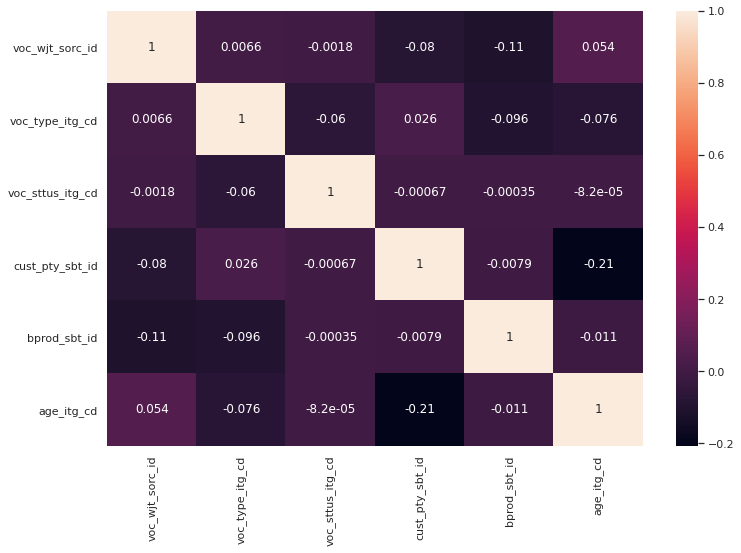

In [86]:
# sns의 heatmap() 함수 사용
# -옵션 : annot=True
# 사이즈 지정 : sns.set(rc={'figure.figsize':(12,8)})



sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, annot=True)

- pairplot : ['voc_prod_sbt_id', 'bprod_sbt_id', 'voc_trt_degr_div_itg_cd','trm_yn']

CPU times: user 7.15 s, sys: 270 ms, total: 7.42 s
Wall time: 7.43 s


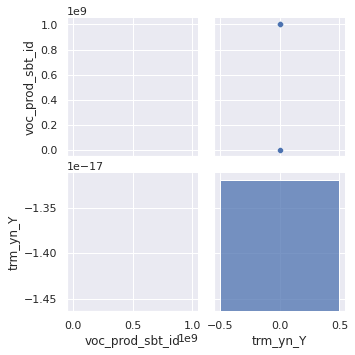

In [87]:
%%time
#sns.pairplot(df1[['voc_prod_sbt_id', 'bprod_sbt_id', 'voc_trt_degr_div_itg_cd','trm_yn_Y']])
sns.pairplot(df1.loc[0:100, ['voc_prod_sbt_id', 'trm_yn_Y']])

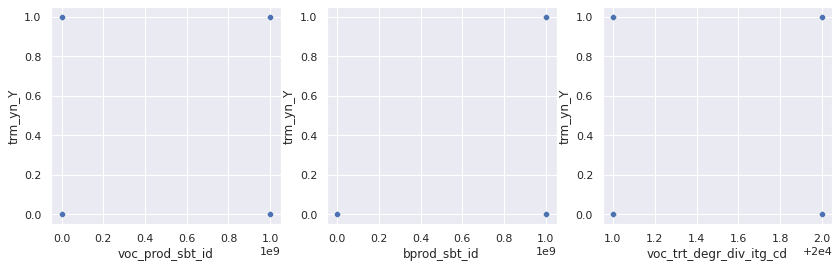

In [88]:
# scatterplot
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(14, 4)
sns.scatterplot(data=df1, x='voc_prod_sbt_id', y='trm_yn_Y', ax=ax1)
sns.scatterplot(data=df1, x='bprod_sbt_id', y='trm_yn_Y', ax=ax2)
sns.scatterplot(data=df1, x='voc_trt_degr_div_itg_cd', y='trm_yn_Y', ax=ax3)

- distplot: voc_prod_sbt_id, bprod_sbt_id, voc_trt_degr_div_itg_cd

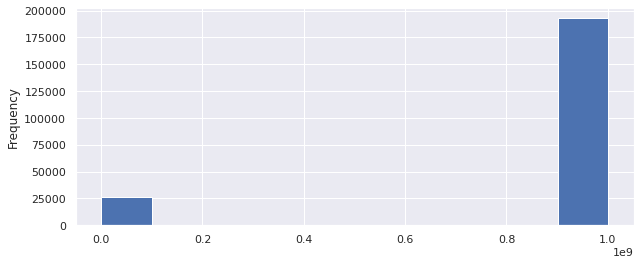

In [89]:
plt.figure(figsize=(10,4))
df1['bprod_sbt_id'].plot(kind='hist')  # plt.hist(df1['bprod_sbt_id'])

In [90]:
vc = df1['trm_yn_Y'].value_counts()
vc

0    213490
1      5405
Name: trm_yn_Y, dtype: int64

<BarContainer object of 2 artists>

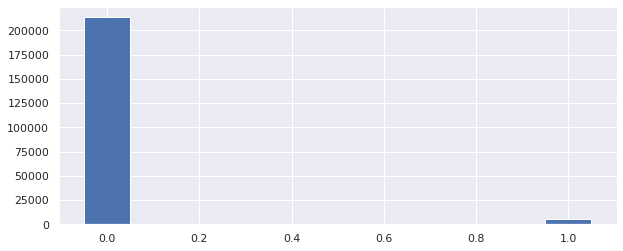

In [91]:
plt.figure(figsize=(10,4))
plt.bar(x=[0,1], height=vc, width=0.1)

# 
# 8. 머신러닝 모델 구현

### 로지스틱 회귀 (LogisticRegression, 분류)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [93]:
%%time
model = LogisticRegression(C=1.0,max_iter=2000)
model.fit(X_train, y_train)

CPU times: user 24.6 s, sys: 46 s, total: 1min 10s
Wall time: 1min 12s


LogisticRegression(max_iter=2000)

- 분류기 성능 평가(score)

In [94]:
model.score(X_test, y_test)

0.9750565339546358

- 분류기 성능 평가 지표

In [95]:
pred = model.predict(X_test)

In [96]:
# 오차행렬
# TN  FP
# FN  TP

confusion_matrix(y_test, pred) 

array([[42675,    23],
       [ 1069,    12]])

In [97]:
# 정확도 : 굉장히 높다
accuracy_score(y_test, pred)  

0.9750565339546358

In [98]:
# 정밀도
precision_score(y_test, pred) 

0.34285714285714286

In [99]:
# 재현율 : 굉장히 낮다.
recall_score(y_test, pred)  

0.011100832562442183

In [100]:
# 정밀도 + 재현율
f1_score(y_test, pred) 

0.02150537634408602

- 분류기 성능 평가(classification_report)

In [101]:
print(classification_report(y_test, pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99     42698
     class 1       0.34      0.01      0.02      1081

    accuracy                           0.98     43779
   macro avg       0.66      0.51      0.50     43779
weighted avg       0.96      0.98      0.96     43779



###  
###  결정트리(DecisionTree)

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

In [104]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [105]:
clf.score(X_test, y_test)

0.975147901962128

###  
###  랜덤포레스트(RandomForest)
+ Bagging 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
+ 여러개의 DecisonTree로 학습하고 다수결로 결정하는 모델

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [108]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
rfc.score(X_test, y_test)

0.9774321021494323

###  
###  XGBoost
+ 여러개의 DecisionTree를 결합하여 Strong Learner 만드는 Boosting 앙상블 기법
+ Kaggle 대회에서 자주 사용하는 모델이다.

In [110]:
!pip install xgboost

Looking in indexes: http://10.220.235.19/pypi/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [111]:
import xgboost as xgb

In [112]:
%%time
xgb_model = xgb.XGBClassifier(n_estimators=5)
xgb_model.fit(X_train, y_train)

[17:53:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 35.4 s, sys: 0 ns, total: 35.4 s
Wall time: 35.6 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=56, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_pred = xgb_model.predict(X_test)

In [114]:
print(confusion_matrix(y_test, y_pred))

[[42652    46]
 [ 1011    70]]


In [115]:
xgb_model.score(X_test, y_test)

0.9758560040201923

###  
###  Light GBM
+ XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 앙상블 기법
+ XGBoost에 비해 학습시간이 짧은 편이다.

In [116]:
!pip install lightgbm

Looking in indexes: http://10.220.235.19/pypi/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [117]:
from lightgbm import LGBMClassifier

In [118]:
%%time
lgbm_model = LGBMClassifier(n_estimators=3)
lgbm_model.fit(X_train, y_train)

CPU times: user 1min 10s, sys: 0 ns, total: 1min 10s
Wall time: 1min 11s


LGBMClassifier(n_estimators=3)

In [119]:
y_pred = lgbm_model.predict(X_test)

In [120]:
print(confusion_matrix(y_test, y_pred))

[[42698     0]
 [ 1077     4]]


In [121]:
lgbm_model.score(X_test, y_test)

0.9753991639827314

###  
###  선형회귀(Linear Regression, 예측)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
x_data = np.array([1.6, 2.3, 3.5, 4.6]).reshape(-1,1)
y_data = np.array([3.3, 5.5, 7.2, 9.9])

In [124]:
lr = LinearRegression()

In [125]:
lr.fit(x_data, y_data)

LinearRegression()

In [126]:
lr.score(x_data, y_data)

0.9824368480454886

In [127]:
lr.predict([[5]])

array([10.64610266])

#  
# 9. 딥러닝 심층신경망 모델 구현

In [128]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

### 하이퍼파라미터 설정 : batch_size, epochs

In [129]:
batch_size = 1024
epochs = 50

### 모델 입력(features) 갯수 확인

In [130]:
X_train.shape

(175116, 38)

### 모델 출력(label) 갯수 확인

In [131]:
y_train.shape

(175116,)

### 1) 이진분류 모델 생성 : Sequential 모델

<br>
<font color=blue>[문제] Sequential 모델 정의하세요.</font>

In [132]:
# Tensoflow의 Sequential() 함수 선어
# 결과 저장 : model


model = Sequential()

<br>
<font color=blue>[문제] 3개의 Hidden Layer을 쌓으세요.</font>

+ 첫번째 Hidden Layer : unit 64 , activation='relu'
+ 두번째 Hidden Layer : unit 32 , activation='relu'
+ 세번째 Hidden Layer : unit 16 , activation='relu'
+ 각 Hidden Layer 마다 Dropout 0.2 비율로 되도록 하세요.

In [133]:
# model.add() 함수와 Dense() 함수 사용
# 첫번째 Hidden Layer 생성시 unit, activation='relu', input_shape=() 입력해야 함
# 첫번째 Hidden Layer 다음에 Dropout(0.2) 추가 



model.add(Dense(64, activation='relu', input_shape=(38,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

In [134]:
# 마지막 Dense에서 1개만 나오므로 'sigmoid' 설정하고 0.5 이하이면 정상, 아니면 해지
model.add(Dense(1,activation='sigmoid'))

### 모델  컴파일 : optimizer, optimizer 설정

In [135]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

### callbacks 함수 설정 : EarlyStopping, ModelCheckpoint

In [136]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('my_checkpoint.ckpt', monitor='val_loss', save_best_only=True, verbose=1)

### 모델 훈련

In [137]:
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test), 
                    verbose=1)

Epoch 1/50
168/172 [============================>.] - ETA: 0s - loss: 0.2075 - acc: 0.9569
Epoch 00001: val_loss improved from inf to 0.10613, saving model to my_checkpoint.ckpt
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_checkpoint.ckpt/assets
172/172 [==============================] - 4s 23ms/step - loss: 0.2060 - acc: 0.9572 - val_loss: 0.1061 - val_acc: 0.9753
Epoch 2/50
169/172 [============================>.] - ETA: 0s - loss: 0.1133 - acc: 0.9753
Epoch 00002: val_loss improved from 0.10613 to 0.10114, saving model to my_checkpoint.ckpt
INFO:tensorflow:Assets written to: my_checkpoint.ckpt/assets
172/172 [==============================] - 4s 21ms/step - loss: 0.1134 - acc: 0.9753 - val_loss: 0.1011 - val_acc: 0.9753
Epoch 3/50
167/172 [============================>.] - ETA: 0s - loss: 0.1082 - acc: 0.9753
Epoch 00003: val_loss improved from 0.10114 to 0.10046, saving model to my_checkpoint.ckpt
INFO:tensor

### 2) 다중분류  모델 생성

- y_train, y_test One-Hot-Encoding

In [138]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [139]:
y_train_ohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [140]:
# 마지막 Dense에서 2개만 나오므로 'softmax' 설정하고 정상,해지의 대한 각각 확률값이 2개나 나옴
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(38,)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [141]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

# Y 레이블 One-Hot-Encoding 되지 않았으면 loss='sparse_categorical_crossentropy' 사용
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

In [142]:
history = model.fit(X_train, y_train_ohe, batch_size=batch_size, epochs=epochs, callbacks=[es,mc], validation_data=(X_test, y_test_ohe), verbose=1)

# 'sparse_categorical_crossentropy' 사용할 경우
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[es,mc], validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
168/172 [============================>.] - ETA: 0s - loss: 0.2284 - acc: 0.9168
Epoch 00001: val_loss did not improve from 0.09294
172/172 [==============================] - 3s 16ms/step - loss: 0.2267 - acc: 0.9178 - val_loss: 0.1061 - val_acc: 0.9753
Epoch 2/50
171/172 [============================>.] - ETA: 0s - loss: 0.1151 - acc: 0.9753
Epoch 00002: val_loss did not improve from 0.09294
172/172 [==============================] - 3s 15ms/step - loss: 0.1151 - acc: 0.9753 - val_loss: 0.0999 - val_acc: 0.9753
Epoch 3/50
168/172 [============================>.] - ETA: 0s - loss: 0.1100 - acc: 0.9753
Epoch 00003: val_loss did not improve from 0.09294
172/172 [==============================] - 3s 15ms/step - loss: 0.1101 - acc: 0.9753 - val_loss: 0.0998 - val_acc: 0.9753
Epoch 4/50
165/172 [===========================>..] - ETA: 0s - loss: 0.1074 - acc: 0.9754
Epoch 00004: val_loss did not improve from 0.09294
172/172 [==============================] - 3s 15ms/step - loss: 0.

In [143]:
model.save('rcp_model.h5')

# 
# 10. 모델 성능 평가

### Accuracy

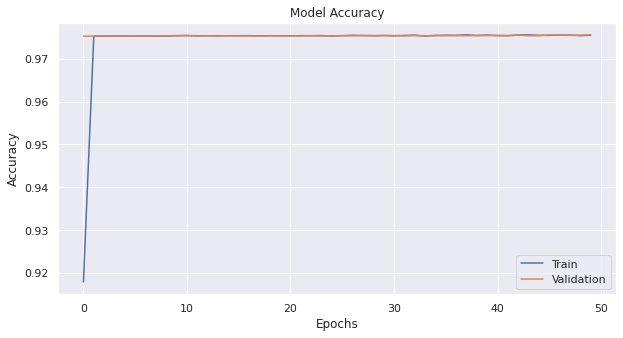

In [144]:
plt.figure(figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc='lower right')

### Loss

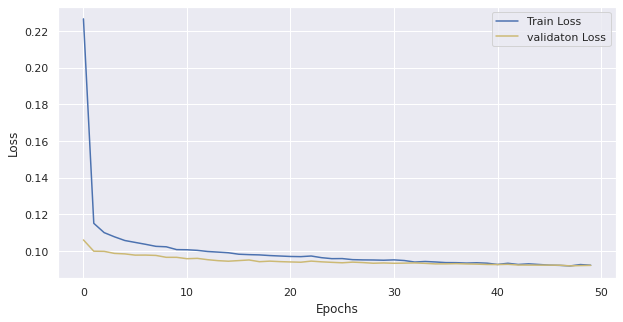

In [145]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], 'b', label='Train Loss')
plt.plot(history.history['val_loss'], 'y', label='validaton Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### 예측

In [146]:
y_test_pred = model.predict(X_test, batch_size=batch_size, verbose=1)

43/43 [==============================] - 0s 2ms/step


In [147]:
y_test = np.argmax(y_test_ohe, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

In [148]:
accuracy_score(y_test, y_test_pred)

0.9755818999977158